![](images/17_01.png)<br>
![](images/17_02.png)

# Yêu cầu 1

In [29]:
data = read.csv("./data/petrol_consumption.csv")

In [2]:
head(data)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence...,Petrol_Consumption
,<dbl>,<int>,<int>,<dbl>,<int>
1,9.0,3571,1976,0.525,541
2,9.0,4092,1250,0.572,524
3,9.0,3865,1586,0.580,561
4,7.5,4870,2351,0.529,414
5,8.0,4399,431,0.544,410
6,10.0,5342,1333,0.571,457


In [3]:
nrow(data)

[1] 48

In [4]:
ncol(data)

[1] 5

In [5]:
str(data)

'data.frame':	48 obs. of  5 variables:
 $ Petrol_tax                  : num  9 9 9 7.5 8 10 8 8 8 7 ...
 $ Average_income              : int  3571 4092 3865 4870 4399 5342 5319 5126 4447 4512 ...
 $ Paved_Highways              : int  1976 1250 1586 2351 431 1333 11868 2138 8577 8507 ...
 $ Population_Driver_licence...: num  0.525 0.572 0.58 0.529 0.544 0.571 0.451 0.553 0.529 0.552 ...
 $ Petrol_Consumption          : int  541 524 561 414 410 457 344 467 464 498 ...


In [6]:
summary(data)

   Petrol_tax     Average_income Paved_Highways  Population_Driver_licence...
 Min.   : 5.000   Min.   :3063   Min.   :  431   Min.   :0.4510              
 1st Qu.: 7.000   1st Qu.:3739   1st Qu.: 3110   1st Qu.:0.5298              
 Median : 7.500   Median :4298   Median : 4736   Median :0.5645              
 Mean   : 7.668   Mean   :4242   Mean   : 5565   Mean   :0.5703              
 3rd Qu.: 8.125   3rd Qu.:4579   3rd Qu.: 7156   3rd Qu.:0.5952              
 Max.   :10.000   Max.   :5342   Max.   :17782   Max.   :0.7240              
 Petrol_Consumption
 Min.   :344.0     
 1st Qu.:509.5     
 Median :568.5     
 Mean   :576.8     
 3rd Qu.:632.8     
 Max.   :968.0     

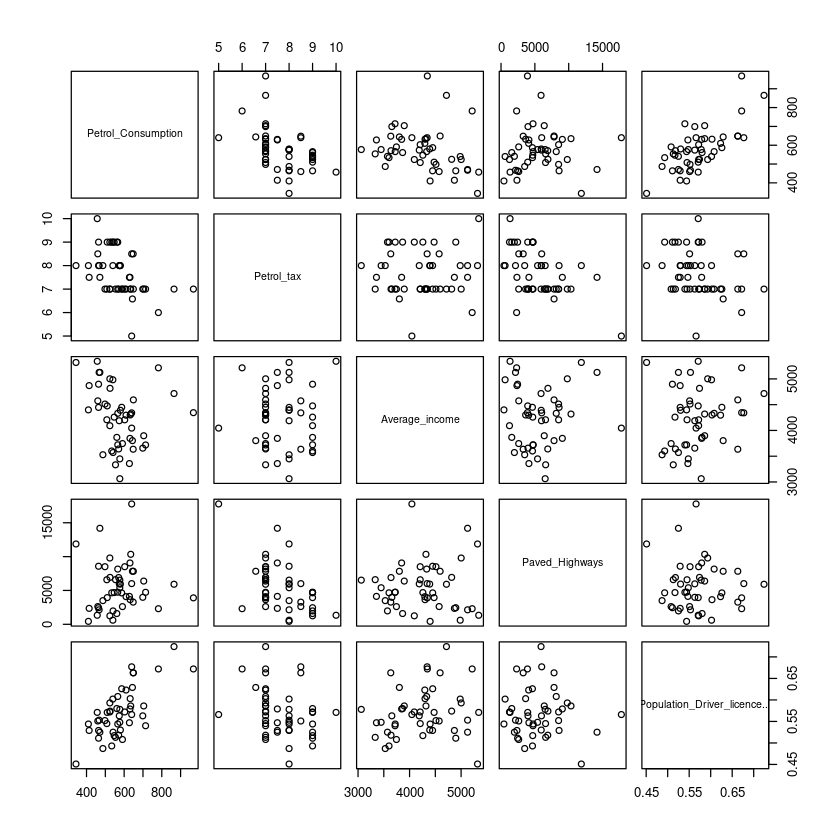

In [7]:
pairs(~Petrol_Consumption + Petrol_tax + Average_income +
       Paved_Highways + Population_Driver_licence...,
      data = data)

In [8]:
input = data[, c('Petrol_tax', 'Population_Driver_licence...', 'Petrol_Consumption')]

In [10]:
head(input)

,Petrol_tax,Population_Driver_licence...,Petrol_Consumption
,<dbl>,<dbl>,<int>
1,9.0,0.525,541
2,9.0,0.572,524
3,9.0,0.580,561
4,7.5,0.529,414
5,8.0,0.544,410
6,10.0,0.571,457


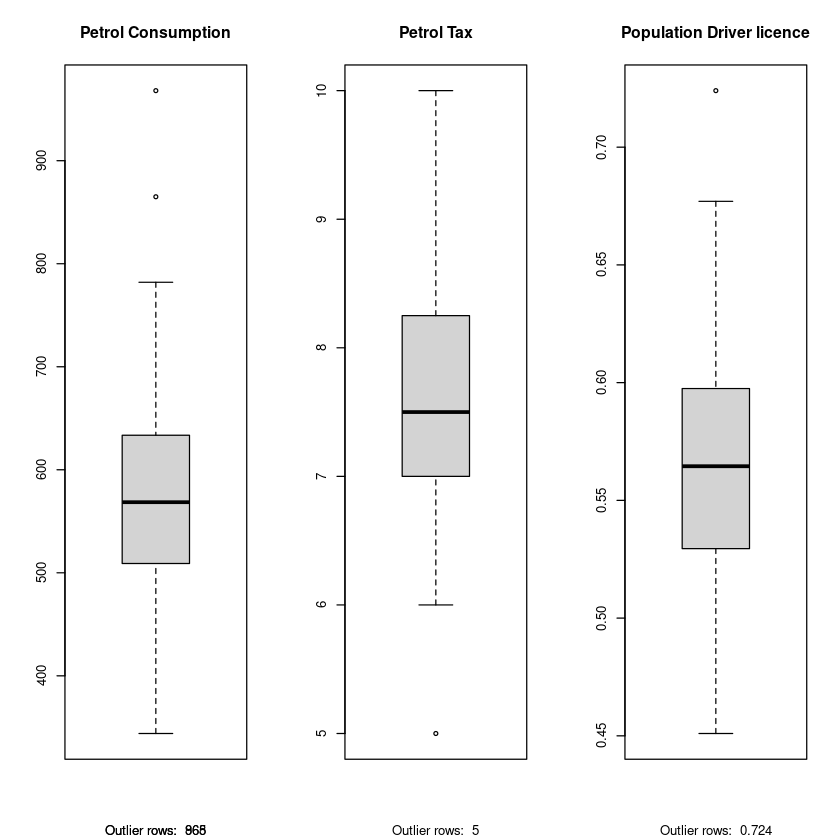

In [11]:
par(mfrow = c(1, 3))
boxplot(input$Petrol_Consumption, main = 'Petrol Consumption',
        sub = paste('Outlier rows: ', boxplot.stats(input$Petrol_Consumption)$out))
boxplot(input$Petrol_tax, main = 'Petrol Tax',
        sub = paste('Outlier rows: ', boxplot.stats(input$Petrol_tax)$out))
boxplot(input$Population_Driver_licence..., main = 'Population Driver licence',
        sub = paste('Outlier rows: ', boxplot.stats(input$Population_Driver_licence...)$out))

In [12]:
pc_outliers = boxplot.stats(input$Petrol_Consumption)$out
pc_outliers

[1] 865 968

In [13]:
pt_outliers = boxplot.stats(input$Petrol_tax)$out
pt_outliers

[1] 5

In [14]:
pd_outliers = boxplot.stats(input$Population_Driver_licence...)$out
pd_outliers

[1] 0.724

In [15]:
input = input[!(input$Petrol_Consumption %in% pc_outliers),]
input = input[!(input$Petrol_tax %in% pt_outliers),]
input = input[!(input$Population_Driver_licence... %in% pd_outliers),]

head(input)

,Petrol_tax,Population_Driver_licence...,Petrol_Consumption
,<dbl>,<dbl>,<int>
1,9.0,0.525,541
2,9.0,0.572,524
3,9.0,0.580,561
4,7.5,0.529,414
5,8.0,0.544,410
6,10.0,0.571,457


In [16]:
nrow(input)

[1] 45

In [17]:
set.seed(42)

trainingRowIndex = sample(1:nrow(input), 0.8*nrow(input))
trainingData = input[trainingRowIndex,]
testData = input[-trainingRowIndex,]

In [18]:
lmMod = lm(Petrol_Consumption ~ Petrol_tax + Population_Driver_licence...,
           data = trainingData)

In [20]:
summary(lmMod)


Call:
lm(formula = Petrol_Consumption ~ Petrol_tax + Population_Driver_licence..., 
    data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.16  -61.70    7.70   58.74  151.40 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)   
(Intercept)                    256.26     221.90   1.155  0.25647   
Petrol_tax                     -31.34      14.47  -2.166  0.03762 * 
Population_Driver_licence...   973.59     270.33   3.602  0.00103 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 71.9 on 33 degrees of freedom
Multiple R-squared:  0.457,	Adjusted R-squared:  0.4241 
F-statistic: 13.89 on 2 and 33 DF,  p-value: 4.205e-05


In [19]:
cPred = predict(lmMod, testData)

In [21]:
mse = mean(lmMod$residuals^2)

mse

[1] 4739.388

In [22]:
mse_test = mean((testData$Petrol_Consumption - cPred)^2)

mse_test

[1] 1247.253

In [23]:
b = coef(lmMod)[1]

b

(Intercept) 
   256.2551

In [24]:
mph = coef(lmMod)[2]

mph

Petrol_tax 
 -31.34155

In [25]:
mpd = coef(lmMod)[3]

mpd

Population_Driver_licence... 
                    973.5906

In [26]:
x1 = 9
x2 = .58

y = mph * x1 + mpd * x2 + b

y

Petrol_tax 
  538.8637

In [28]:
y = predict(lmMod, data.frame(Petrol_tax = x1, Population_Driver_licence... = x2))

y

1 
538.8637

# Yêu cầu 2

In [31]:
library(BMA)

In [32]:
yvar = data[, 'Petrol_Consumption']
xvars = data[, -5]
bma = bicreg(xvars, yvar, strict = F, OR = 2)

In [33]:
summary(bma)


Call:
bicreg(x = xvars, y = yvar, strict = F, OR = 2)


  1  models were selected
 Best  1  models (cumulative posterior probability =  1 ): 

                              p!=0   EV         SD         model 1   
Intercept                     100    307.32790  156.83067   307.32790
Petrol_tax                    100    -29.48381   10.58358   -29.48381
Average_income                100     -0.06802    0.01701    -0.06802
Paved_Highways                  0      0.00000    0.00000       .    
Population_Driver_licence...  100   1374.76841  183.66954  1374.76841
                                                                     
nVar                                                            3    
r2                                                            0.675  
BIC                                                         -42.31437
post prob                                                     1      


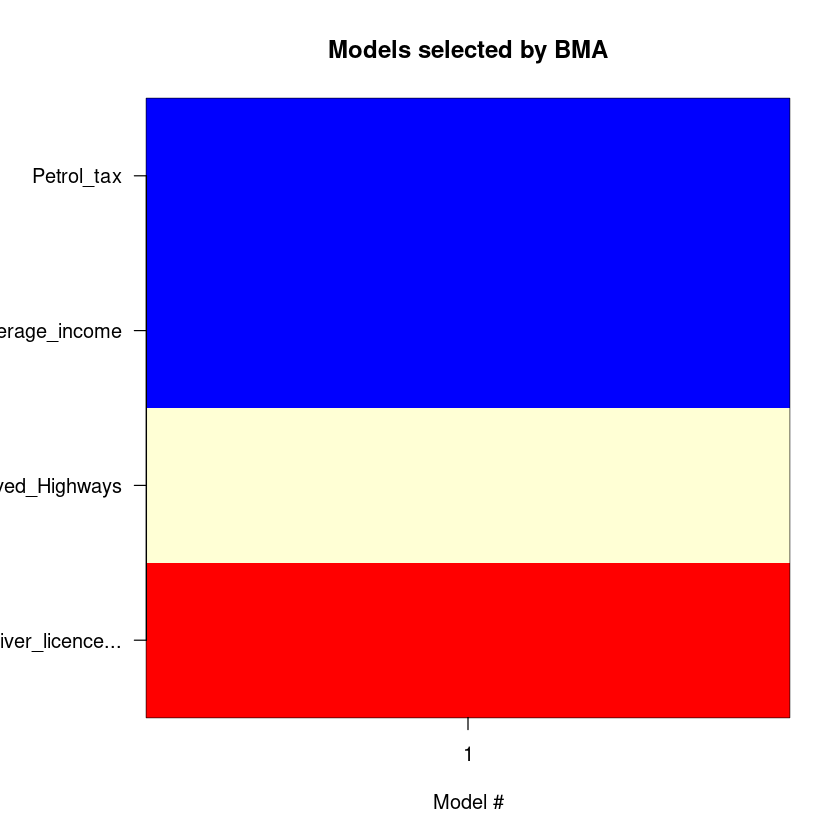

In [34]:
imageplot.bma(bma)